# Manali Kulkarni



# Task-2 : Supervised Machine Learning Algorithm

Our objective is to predict the score if the students study for 9.25 hours in a day.



# Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score baseed upon the number of hours they studied,this is a simple linear regression task as it involves just two variables.

In [3]:
#Importing liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
import seaborn as sns
%matplotlib inline

In [5]:
dataset= pd.read_csv('C:/Users/acer/Downloads/spark_data.csv')   #import the data

In [11]:
dataset.shape

(25, 2)

In [12]:
dataset

,Hours,scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [13]:
dataset.describe()            #Basic details of dataset

,Hours,scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [15]:
#Analysing the Correlation between variables
correlation=dataset.corr()
correlation

,Hours,scores
Hours,1.000000,0.976191
scores,0.976191,1.000000


<AxesSubplot:>

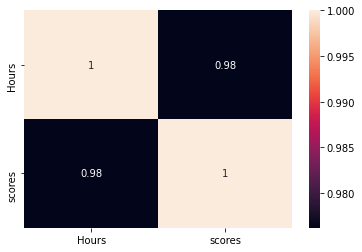

In [51]:
sns.heatmap(dataset.corr(),annot=True)

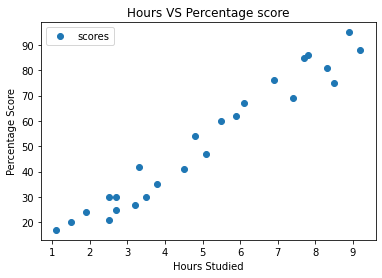

In [50]:
#Plotting the distribution of scores
dataset.plot(x='Hours', y='scores',style='o')
plt.title('Hours VS Percentage score')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

<AxesSubplot:xlabel='scores', ylabel='Count'>

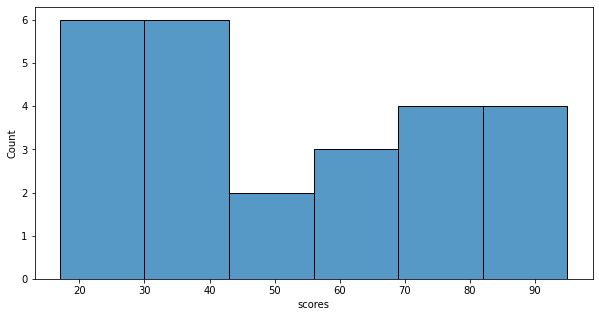

In [54]:
plt.figure(figsize=(10,5))
plt.tight_layout()
seabornInstance.histplot(dataset['scores'])

From the above graph we can see that average maximum percentage of scores is between 20 and 40

In [25]:
x=dataset.iloc[:,:-1].values   #independent variable
y=dataset.iloc[:,1].values     #dependent variable

# Train Test Split

In [38]:
#Splitting the data into 80% train and 20% test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=0) 

# Trainning the algorithm

In [40]:
#Training the algorithm
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train, y_train)
print("Training complete")

Training complete


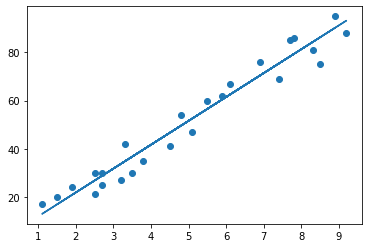

In [44]:
#Plotting the regression line
line=regressor.coef_*x+regressor.intercept_
#plotting for the test data
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

# Predictons
Now that we have trained our algorithm. We will make some predictions.

In [45]:
print(x_test)   #Testing data in hours.
y_pred=regressor.predict(x_test)   #preddicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [49]:
#Comparing actual vs predicted
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


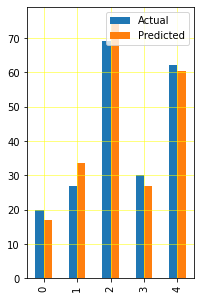

In [57]:
df1=df.head(25)
df1.plot(kind='bar', figsize=(3,5))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='yellow')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='blue')
plt.show()

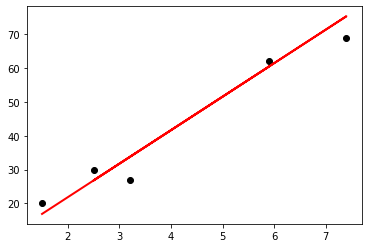

In [60]:
plt.scatter(x_test, y_test, color='black')
plt.plot(x_test, y_pred, color='red',linewidth=2)
plt.show()

The straight line in the above graph shows our algorithm is correct.

# Prediction of score if a student study 9.25 hours in a day

In [65]:
#testing with our own data
hours=9.25
pred=regressor.predict([[hours]])
print("No of Hours=",format(hours))
print("Predicted Score=",format(pred[0]))

No of Hours= 9.25
Predicted Score= 93.69173248737538


In [67]:
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.18385989900298
Mean Squared Error: 21.598769307217413
Root Mean Squared Error: 4.647447612100368


# Model Evaluation

The final step is to evaluate the performance of algorithm.This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean squared error.There are many such metrics.

The value of root mean squared error is 4.64. It is less than 10% of the mean value of the percentage of all the student i.e.51.48.

# Thank You!!!